In [1]:
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.io import imsave
import numpy as np
from PIL import Image
%matplotlib inline

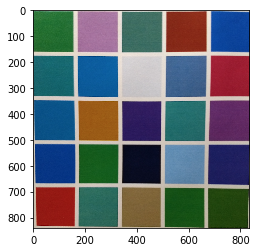

In [2]:
plt.imshow(plt.imread("light.jpg"))

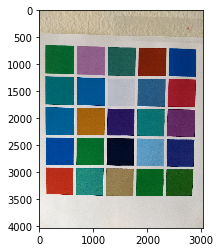

In [4]:
plt.imshow(plt.imread("daylight.jpg"))

In [7]:
b1 = []
b2 =[]
b3=[]
r1 =[]
r2 =[]
r3=[]
g1 =[]
g2 =[]
g3=[]

In [8]:
lightDir = "./light/"
trueDir = "./true/"
daylightDir = "./daylight/"

In [9]:
for i in range(1,26):
    img1 = imread(lightDir +"l"+str(i)+".png")
    img2 = imread(trueDir +"t"+str(i)+".png")
    img3 = imread(daylightDir +"d"+str(i)+".png")
    average_color1 = [img1[:, :, i].mean() for i in range(img1.shape[-1])]
    b1.append(average_color1[2])
    r1.append(average_color1[0])
    g1.append(average_color1[1])
    average_color2 = [img2[:, :, i].mean() for i in range(img2.shape[-1])]
    b2.append(average_color2[2])
    r2.append(average_color2[0])
    g2.append(average_color2[1])
    average_color3 = [img3[:, :, i].mean() for i in range(img3.shape[-1])]
    b3.append(average_color3[2])
    r3.append(average_color3[0])
    g3.append(average_color3[1])

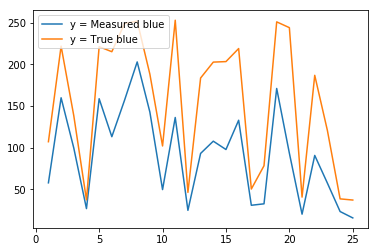

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,26)

plt.plot(x, b1)
plt.plot(x, b2)

plt.legend(['y = Measured blue', 'y = True blue'], loc='upper left')

plt.show()

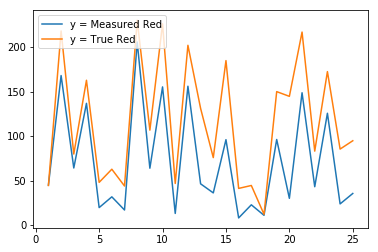

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,26)


plt.plot(x, r1)
plt.plot(x, r2)


plt.legend([ 'y = Measured Red', 'y = True Red'], loc='upper left')

plt.show()

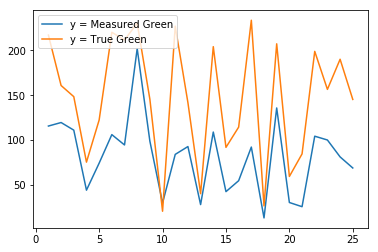

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,26)

plt.plot(x, g1)
plt.plot(x, g2)

plt.legend(['y = Measured Green', 'y = True Green'], loc='upper left')

plt.show()

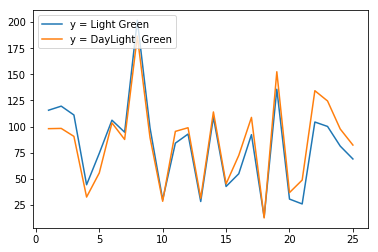

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,26)

plt.plot(x, g1)
plt.plot(x, g3)

plt.legend(['y = Light Green', 'y = DayLight  Green'], loc='upper left')

plt.show()

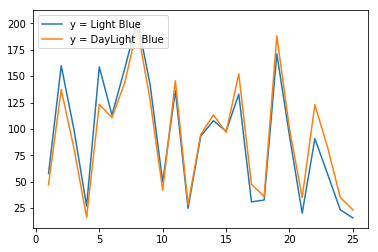

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,26)

plt.plot(x, b1)
plt.plot(x, b3)

plt.legend(['y = Light Blue', 'y = DayLight  Blue'], loc='upper left')

plt.show()

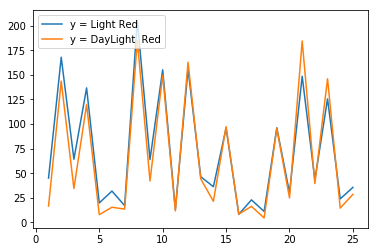

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,26)

plt.plot(x, r1)
plt.plot(x, r3)

plt.legend(['y = Light Red', 'y = DayLight  Red'], loc='upper left')

plt.show()

In [65]:
from sklearn import svm

X = np.array(r1[0:16] + r1[17:])
y = np.array(r3[:16]+r3[17:])
X.shape = (X.shape[0],1)
y.shape = (y.shape[0],1)
print X.shape,y.shape

svr_rbf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = svm.SVR(kernel='linear', C=1e3)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)

test_X = np.array([r1[16]])
test_X.shape = (test_X.shape[0],1)
print svr_rbf.predict(test_X)
print "predicted red", svr_lin.predict(test_X)
print "true red", r3[16]

(24, 1) (24, 1)
[ 10.70584451]
predicted red [ 16.31366077]
true red 16.1977406155


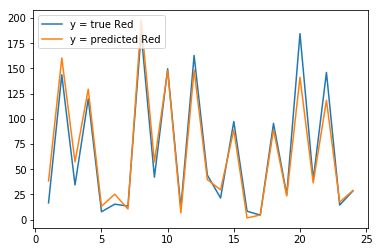

In [66]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,25)

plt.plot(x, y)
plt.plot(x, y_lin)

plt.legend(['y = true Red', 'y = predicted Red'], loc='upper left')

plt.show()

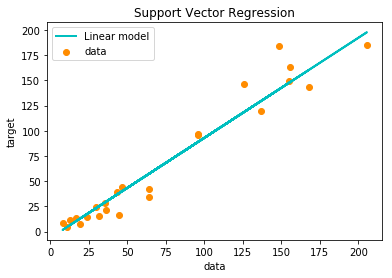

In [67]:
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
# plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [68]:
from sklearn import svm

X = np.array(g1[0:16] + g1[17:])
y = np.array(g3[:16]+g3[17:])
X.shape = (X.shape[0],1)
y.shape = (y.shape[0],1)
print X.shape,y.shape

svr_rbf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = svm.SVR(kernel='linear', C=1e3)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)

test_X = np.array([g1[16]])
test_X.shape = (test_X.shape[0],1)
print svr_rbf.predict(test_X)

print "predicted green",svr_lin.predict(test_X)
print "true green", g3[16]

(24, 1) (24, 1)
[ 99.36783115]
predicted green [ 91.36146696]
true green 108.80061377


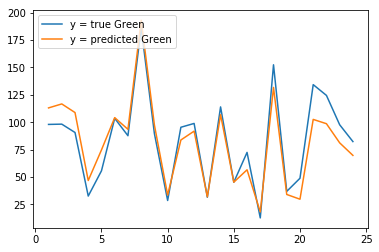

In [69]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,25)

plt.plot(x, y)
plt.plot(x, y_lin)

plt.legend(['y = true Green', 'y = predicted Green'], loc='upper left')

plt.show()

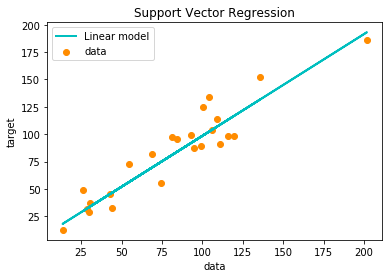

In [70]:
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
# plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [71]:
from sklearn import svm

X = np.array(b1[0:16] + b1[17:])
y = np.array(b3[:16]+b3[17:])
X.shape = (X.shape[0],1)
y.shape = (y.shape[0],1)
print X.shape,y.shape

svr_rbf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = svm.SVR(kernel='linear', C=1e3)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)

test_X = np.array([b1[16]])
test_X.shape = (test_X.shape[0],1)
print svr_rbf.predict(test_X)

print "Predicted blue", svr_lin.predict(test_X)
print "true blue", b3[16]

(24, 1) (24, 1)
[ 39.10450338]
Predicted blue [ 36.53691808]
true blue 47.4287938089


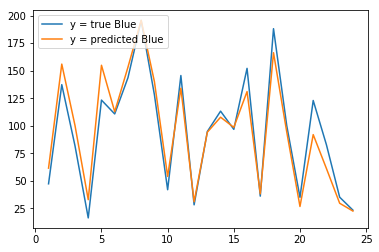

In [72]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,25)

plt.plot(x, y)
plt.plot(x, y_lin)

plt.legend(['y = true Blue', 'y = predicted Blue'], loc='upper left')

plt.show()

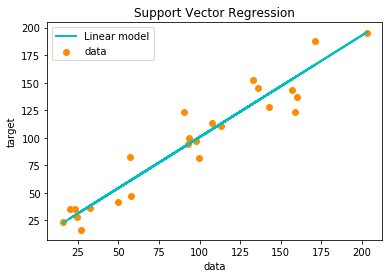

In [73]:
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
# plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [74]:
print r3[16],g3[16],b3[16]

16.1977406155 108.80061377 47.4287938089


In [75]:
from sklearn.kernel_ridge import KernelRidge
X = np.array(r1[:16]+r1[17:])
y = np.array(r3[:16]+r3[17:])
X.shape = (X.shape[0],1)
y.shape = (y.shape[0],1)
clf = KernelRidge(alpha=1.0)
y_pred = clf.fit(X, y).predict(X) 
test_X = np.array([r1[16]])
test_X.shape = (test_X.shape[0],1)
print "predicted red", clf.predict(test_X)
print "true red", r3[16]

predicted red [[ 21.8519802]]
true red 16.1977406155


In [76]:
from sklearn.kernel_ridge import KernelRidge
X = np.array(g1[:16]+g1[17:])
y = np.array(g3[:16]+g3[17:])
X.shape = (X.shape[0],1)

y.shape = (y.shape[0],1)
clf = KernelRidge(alpha=1.0)
y_pred = clf.fit(X, y).predict(X) 
test_X = np.array([g1[16]])
test_X.shape = (test_X.shape[0],1)

print "predicted green", clf.predict(test_X)
print "true green", g3[16]

predicted green [[ 92.44159514]]
true green 108.80061377


In [77]:
from sklearn.kernel_ridge import KernelRidge
X = np.array(b1[:16]+b1[17:])
y = np.array(b3[:16]+b3[17:])
y.shape = (y.shape[0],1)
X.shape = (X.shape[0],1)

clf = KernelRidge(alpha=1.0)
y_pred = clf.fit(X, y).predict(X) 
test_X = np.array([b1[16]])
test_X.shape = (test_X.shape[0],1)

print "predicted blue", clf.predict(test_X)
print "true blue", b3[16]

predicted blue [[ 30.25491785]]
true blue 47.4287938089


In [78]:
print r3[16],g3[16],b3[16]

16.1977406155 108.80061377 47.4287938089
